# CSCE 623 Homework Assignment 2
## Student Name: Marvin Newlin
## Date: 23 Apr 19



In [167]:
"""
HW2
"""

import numpy as np
import matplotlib.pyplot as plt

#make plots inline using jupyter magic
%matplotlib inline

import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn import datasets, linear_model, metrics

# Imports from Chapter 4 Lab
import matplotlib as mpl
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing
from sklearn import neighbors

import statsmodels.api as sm
import statsmodels.formula.api as smf

from IPython.display import Markdown as md  #enable markdown within code cell
from IPython.display import display, Math, Latex

# Step 1

##### Read in CSV files to dataframes

In [168]:
# Read CSV files into dataframes
data1_csv = 'dataset1.csv'
data2_csv = 'dataset2.csv'
data3_csv = 'dataset3.csv'

#Header lines in CSV files don't give me any useful info so I
# skip the header row and add column names that are more useful
data1 = pd.read_csv(data1_csv, skiprows=1, names=['index','cat1', 'cat2', 'class'])
data2 = pd.read_csv(data2_csv, skiprows=1, names=['index','cat1', 'cat2', 'class'])
data3 = pd.read_csv(data3_csv, skiprows=1, names=['index','cat1', 'cat2', 'class'])


# Step 2

#### Display datasets and statistics

In [169]:
display(md("First 5 entries of dataset 1"))
display(data1.head())
display(md("Dataset 1 statistics"))
display(data1.describe())
display(md("First 5 entries of dataset 2"))
display(data2.head())
display(md("Dataset 2 statistics"))
display(data2.describe())
display(md("First 5 entries of dataset 3"))
display(data3.head())
display(md("Dataset 3 statistics"))
display(data3.describe())

First 5 entries of dataset 1

,index,cat1,cat2,class
0,0,0.548814,0.715189,0.0
1,1,0.602763,0.544883,0.0
2,2,0.423655,0.645894,0.0
3,3,0.437587,0.891773,0.0
4,4,0.963663,0.383442,0.0


Dataset 1 statistics

,index,cat1,cat2,class
count,600.000000,600.000000,600.000000,600.000000
mean,299.500000,0.747401,0.494678,0.500000
std,173.349358,0.380747,0.296411,0.500417
min,0.000000,0.002703,0.000546,0.000000
25%,149.750000,0.510941,0.244774,0.000000
50%,299.500000,0.730347,0.466113,0.500000
75%,449.250000,0.984056,0.754525,1.000000
max,599.000000,1.499809,0.999278,1.000000


First 5 entries of dataset 2

,index,cat1,cat2,class
0,0,0.332130,-0.313696,0.0
1,1,1.859941,0.290296,0.0
2,2,-0.811141,-0.654312,0.0
3,3,-0.125626,-0.253332,0.0
4,4,0.340797,0.118178,0.0


Dataset 2 statistics

,index,cat1,cat2,class
count,600.000000,600.000000,600.000000,600.000000
mean,299.500000,0.473725,0.495420,0.500000
std,173.349358,0.951497,0.576779,0.500417
min,0.000000,-2.528299,-0.856548,0.000000
25%,149.750000,-0.152288,0.018048,0.000000
50%,299.500000,0.460075,0.515972,0.500000
75%,449.250000,1.121963,0.973737,1.000000
max,599.000000,3.290265,1.786571,1.000000


First 5 entries of dataset 3

,index,cat1,cat2,class
0,0,2.000786,-2.967885,0.0
1,1,11.204466,1.179775,0.0
2,2,-4.886389,-5.103305,0.0
3,3,-0.756786,-2.112077,0.0
4,4,2.052993,0.781276,0.0


Dataset 3 statistics

,index,cat1,cat2,class
count,600.000000,600.000000,600.000000,600.000000
mean,299.500000,0.477786,2.196081,0.500000
std,173.349358,3.822859,4.382142,0.500417
min,0.000000,-15.230715,-10.529514,0.000000
25%,149.750000,-1.234267,-0.722251,0.000000
50%,299.500000,0.802649,1.376222,0.500000
75%,449.250000,2.632443,4.799941,1.000000
max,599.000000,12.062268,20.120173,1.000000


Text(0.5, 1.0, 'Scatterplot of Dataset 3')

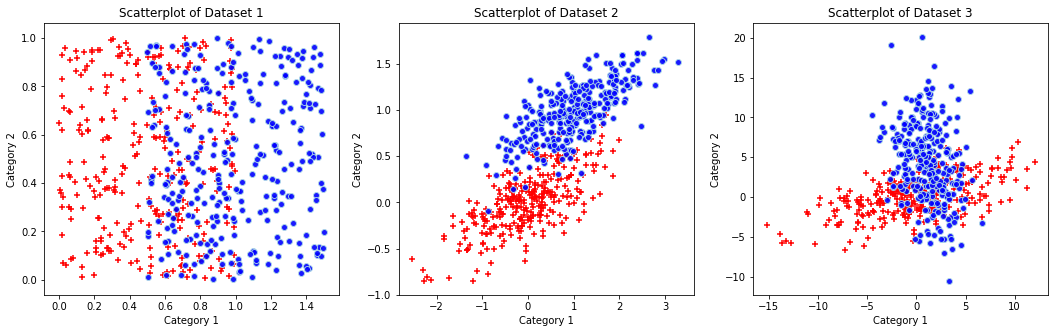

In [170]:
# Code for plotting scatter plot of data. Code modified from ISLR Chapter 4 lab code on github
fig1 = plt.figure(figsize=(18,5))
gs = mpl.gridspec.GridSpec(1, 3)
ax1 = plt.subplot(gs[0,0])
ax1.scatter(data1[data1['class']==0].cat1, data1[data1['class']==0].cat2, c='red', marker='+', linewidths=1)
ax1.scatter(data1[data1['class']==1].cat1, data1[data1['class']==1].cat2, c='blue', marker='o', linewidths=1,
           edgecolors='lightblue', facecolors='white', alpha=.9)
ax1.set_ylabel('Category 2')
ax1.set_xlabel('Category 1')
ax1.set_title('Scatterplot of Dataset 1')
#Plot dataset 2
ax2 = plt.subplot(gs[0,1])
ax2.scatter(data2[data2['class']==0].cat1, data2[data2['class']==0].cat2, c='red', marker='+', linewidths=1)
ax2.scatter(data2[data2['class']==1].cat1, data2[data2['class']==1].cat2, c='blue', marker='o', linewidths=1,
           edgecolors='lightblue', facecolors='white', alpha=.9)
ax2.set_ylabel('Category 2')
ax2.set_xlabel('Category 1')
ax2.set_title('Scatterplot of Dataset 2')
#Plot dataset 3
ax3 = plt.subplot(gs[0,2])
ax3.scatter(data3[data3['class']==0].cat1, data3[data3['class']==0].cat2, c='red', marker='+', linewidths=1)
ax3.scatter(data3[data3['class']==1].cat1, data3[data3['class']==1].cat2, c='blue', marker='o', linewidths=1,
           edgecolors='lightblue', facecolors='white', alpha=.9)
ax3.set_ylabel('Category 2')
ax3.set_xlabel('Category 1')
ax3.set_title('Scatterplot of Dataset 3')

# Step 3

#### Discussion of Datasets

# Step 4

#### Split datasets into test and training

In [171]:
#The code for this function is based on the in class logistic1d function code
"""
This function splits the provided dataframe into test and training sets based on the provided
split fraction (a float between 0 and 1)
"""
def split_test_train(df, fraction):
    length = len(df['index'])
    df_train0 = df[df['index'] < (length/4)] # first half of 0 class (first 1/4th of the dataset) 
    df_train1 = df[(df['index'] >= (length/2)) & (df['index'] < (3*length/4))] # first half of 1 class (3rd quarter)
    df_test0 = df[(df['index'] >= (length/4)) & (df['index'] < (length/2))] # second half of 0 class (2nd quarter)
    df_test1 = df[df['index'] >= (3*length/4)] # second half of 1 class (last quarter)
    train_frames = [df_train0, df_train1]
    df_train = pd.concat(train_frames)
    test_frames = [df_test0, df_test1]
    df_test = pd.concat(test_frames)
    return (df_test, df_train)


### Dataset 1

In [172]:
#Split dataset 1 into test and train
test_train1 = split_test_train(data1, 0.5)
data1_test = test_train1[0]
data1_train = test_train1[1]

display(data1_test.describe())
display(data1_test.head())
display(data1_train.describe())
display(data1_train.head())


,index,cat1,cat2,class
count,300.000000,300.000000,300.000000,300.000000
mean,374.500000,0.736856,0.501839,0.500000
std,156.385543,0.383782,0.303126,0.500835
min,150.000000,0.002703,0.010064,0.000000
25%,224.750000,0.501715,0.255383,0.000000
50%,374.500000,0.725004,0.457067,0.500000
75%,524.250000,0.984056,0.784684,1.000000
max,599.000000,1.499809,0.997994,1.000000


,index,cat1,cat2,class
150,150,0.906555,0.774047,0.0
151,151,0.333145,0.081101,0.0
152,152,0.407241,0.232234,0.0
153,153,0.132488,0.053427,0.0
154,154,0.725594,0.011427,0.0


,index,cat1,cat2,class
count,300.000000,300.000000,300.000000,300.000000
mean,224.500000,0.757946,0.487518,0.500000
std,156.385543,0.378033,0.289869,0.500835
min,0.000000,0.011714,0.000546,0.000000
25%,74.750000,0.522898,0.238283,0.000000
50%,224.500000,0.740554,0.478877,0.500000
75%,374.250000,0.983291,0.731078,1.000000
max,449.000000,1.491890,0.999278,1.000000


,index,cat1,cat2,class
0,0,0.548814,0.715189,0.0
1,1,0.602763,0.544883,0.0
2,2,0.423655,0.645894,0.0
3,3,0.437587,0.891773,0.0
4,4,0.963663,0.383442,0.0


### Dataset 2
    

In [173]:
#Split dataset 2 into test and train
test_train2 = split_test_train(data2, 0.5)
data2_test = test_train2[0]
data2_train = test_train2[1]

display(data2_test.describe())
display(data2_test.head())
display(data2_train.describe())
display(data2_train.head())

,index,cat1,cat2,class
count,300.000000,300.000000,300.000000,300.000000
mean,374.500000,0.462264,0.483399,0.500000
std,156.385543,0.983031,0.573959,0.500835
min,150.000000,-2.528299,-0.847026,0.000000
25%,224.750000,-0.187462,-0.004776,0.000000
50%,374.500000,0.434963,0.508892,0.500000
75%,524.250000,1.150620,0.967250,1.000000
max,599.000000,3.290265,1.618334,1.000000


,index,cat1,cat2,class
150,150,1.376248,0.681871,0.0
151,151,-0.564548,-0.129263,0.0
152,152,-0.382397,-0.259234,0.0
153,153,-1.117776,-0.002866,0.0
154,154,-0.132446,-0.196270,0.0


,index,cat1,cat2,class
count,300.000000,300.000000,300.000000,300.000000
mean,224.500000,0.485185,0.507442,0.500000
std,156.385543,0.920384,0.580295,0.500835
min,0.000000,-2.301252,-0.856548,0.000000
25%,74.750000,-0.124554,0.046961,0.000000
50%,224.500000,0.505978,0.521982,0.500000
75%,374.250000,1.081577,0.984248,1.000000
max,449.000000,2.976019,1.786571,1.000000


,index,cat1,cat2,class
0,0,0.332130,-0.313696,0.0
1,1,1.859941,0.290296,0.0
2,2,-0.811141,-0.654312,0.0
3,3,-0.125626,-0.253332,0.0
4,4,0.340797,0.118178,0.0


### Dataset 3

In [174]:
#Split dataset 3 into test and train
test_train3 = split_test_train(data3, 0.5)
data3_test = test_train3[0]
data3_train = test_train3[1]

display(data3_test.describe())
display(data3_test.head())
display(data3_train.describe())
display(data3_train.head())

,index,cat1,cat2,class
count,300.000000,300.000000,300.000000,300.000000
mean,374.500000,0.116346,2.557350,0.500000
std,156.385543,3.822758,4.528323,0.500835
min,150.000000,-15.230715,-5.739253,0.000000
25%,224.750000,-1.554478,-0.641305,0.000000
50%,374.500000,0.520179,1.619968,0.500000
75%,524.250000,2.200002,5.421993,1.000000
max,599.000000,12.062268,20.120173,1.000000


,index,cat1,cat2,class
150,150,8.290653,4.934437,0.0
151,151,-3.400891,-0.715921,0.0
152,152,-2.303599,-1.977774,0.0
153,153,-6.733588,0.783112,0.0
154,154,-0.797867,-1.610949,0.0


,index,cat1,cat2,class
count,300.000000,300.000000,300.000000,300.000000
mean,224.500000,0.839226,1.834812,0.500000
std,156.385543,3.794963,4.207488,0.500835
min,0.000000,-13.862964,-10.529514,0.000000
25%,74.750000,-1.035905,-0.791177,0.000000
50%,224.500000,1.091485,1.167955,0.500000
75%,374.250000,3.002688,4.006558,1.000000
max,449.000000,11.204466,16.406478,1.000000


,index,cat1,cat2,class
0,0,2.000786,-2.967885,0.0
1,1,11.204466,1.179775,0.0
2,2,-4.886389,-5.103305,0.0
3,3,-0.756786,-2.112077,0.0
4,4,2.052993,0.781276,0.0


# Step 5

### Create Design matrices and response vectors for each dataset

In [175]:
# Logistic Regression Model

# Feature vectors for dataset 1
x1 = data1_train['cat1']
x2 = data1_train['cat2']
y1 =  data1_train['class'] # y vector from training dataset 1
# Create nx2 matrix of feature vectors from training dataset 1
X1 = np.vstack((x1, x2)).T
print('Dimensions of X1: ' + str(X1.shape))

# Feature vectors for training dataset 2
x1 = data2_train['cat1']
x2 = data2_train['cat2']
y2 =  data2_train['class'] # y vector from training dataset 2
# Create nx2 matrix of feature vectors from training dataset 2
X2 = np.vstack(( x1, x2)).T
print('Dimensions of X2: ' + str(X2.shape))


# Feature vectors for training dataset 3
x1 = data3_train['cat1']
x2 = data3_train['cat2']
y3 =  data3_train['class'] # y vector from training dataset 3
# Create nx2 matrix of feature vectors from training dataset 3
X3 = np.vstack(( x1, x2)).T
print('Dimensions of X3: ' + str(X3.shape))



Dimensions of X1: (300, 2)
Dimensions of X2: (300, 2)
Dimensions of X3: (300, 2)


### Train Models
#### Logistic Regression

In [176]:
log_reg1 = skl_lm.LogisticRegression(solver='liblinear')
log_reg2 = skl_lm.LogisticRegression(solver='liblinear')
log_reg3 = skl_lm.LogisticRegression(solver='liblinear')

log_reg1.fit(X1, y1)
log_reg2.fit(X2, y2)
log_reg3.fit(X3, y3)

#Print Dataset 1 coefficients
display(md("##### Dataset 1 beta values"))
display(md(r" $\beta_0$: %f" %log_reg1.intercept_))
display(md(r" $\beta_1$: %f" %log_reg1.coef_[0,0]))
display(md(r" $\beta_2$: %f" %log_reg1.coef_[0,1]))

#Print Dataset 2 coefficients
display(md("##### Dataset 2 beta values"))
display(md(r" $\beta_0$: %f" %log_reg2.intercept_))
display(md(r" $\beta_1$: %f" %log_reg2.coef_[0,0]))
display(md(r" $\beta_2$: %f" %log_reg2.coef_[0,1]))

#Print Dataset 3 coefficients
display(md("##### Dataset 3 beta values"))
display(md(r" $\beta_0$: %f" %log_reg3.intercept_))
display(md(r" $\beta_1$: %f" %log_reg3.coef_[0,0]))
display(md(r" $\beta_2$: %f" %log_reg3.coef_[0,1]))

##### Dataset 1 beta values

 $\beta_0$: -2.748916

 $\beta_1$: 4.003120

 $\beta_2$: -0.486907

##### Dataset 2 beta values

 $\beta_0$: -2.488031

 $\beta_1$: -0.847467

 $\beta_2$: 5.797421

##### Dataset 3 beta values

 $\beta_0$: -0.392890

 $\beta_1$: 0.015495

 $\beta_2$: 0.223014

#### Linear Discriminant Analysis

In [177]:
lda1 = LinearDiscriminantAnalysis(solver='lsqr') # Use slqr to get covariance matrix
lda2 = LinearDiscriminantAnalysis(solver='lsqr')
lda3 = LinearDiscriminantAnalysis(solver='lsqr')

lda1.fit(X1, y1)
lda2.fit(X2, y2)
lda3.fit(X3, y3)

#Print Dataset 1 coefficients
display(md("##### Dataset 1 beta values"))
display(md(r" $\beta_0$: %f" %lda1.intercept_))
display(md(r" $\beta_1$: %f" %lda1.coef_[0,0]))
display(md(r" $\beta_2$: %f" %lda1.coef_[0,1]))

#Print Dataset 2 coefficients
display(md("##### Dataset 2 beta values"))
display(md(r" $\beta_0$: %f" %lda2.intercept_))
display(md(r" $\beta_1$: %f" %lda2.coef_[0,0]))
display(md(r" $\beta_2$: %f" %lda2.coef_[0,1]))

#Print Dataset 3 coefficients
display(md("##### Dataset 3 beta values"))
display(md(r" $\beta_0$: %f" %lda3.intercept_))
display(md(r" $\beta_1$: %f" %lda3.coef_[0,0]))
display(md(r" $\beta_2$: %f" %lda3.coef_[0,1]))

##### Dataset 1 beta values

 $\beta_0$: -4.484797

 $\beta_1$: 6.125359

 $\beta_2$: -0.323873

##### Dataset 2 beta values

 $\beta_0$: -5.957747

 $\beta_1$: -2.943577

 $\beta_2$: 14.555226

##### Dataset 3 beta values

 $\beta_0$: -0.416956

 $\beta_1$: 0.020448

 $\beta_2$: 0.217895

#### Quadratic Discriminant Analysis 

In [178]:
qda1 = QuadraticDiscriminantAnalysis()
qda2 = QuadraticDiscriminantAnalysis()
qda3 = QuadraticDiscriminantAnalysis()

qda1.fit(X1, y1)
qda2.fit(X2, y2)
qda3.fit(X3, y3)


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)

# Step 6

### Predicted probabilities

#### Create Test Matrices

In [179]:
# Create Test Matrices

# Feature vectors for dataset 1
x1_test = data1_test['cat1']
x2_test = data1_test['cat2']
y1_test =  data1_test['class'] # y vector from training dataset 1
# Create nx2 matrix of feature vectors from training dataset 1
X1_test = np.vstack((x1_test, x2_test)).T
print('Dimensions of X1 Test: ' + str(X1_test.shape))

# Feature vectors for training dataset 2
x1_test = data2_test['cat1']
x2_test = data2_test['cat2']
y2_test =  data2_test['class'] # y vector from training dataset 2
# Create nx2 matrix of feature vectors from training dataset 2
X2_test = np.vstack(( x1_test, x2_test)).T
print('Dimensions of X2 Test: ' + str(X2_test.shape))


# Feature vectors for training dataset 3
x1_test = data3_test['cat1']
x2_test = data3_test['cat2']
y3_test =  data3_test['class'] # y vector from training dataset 3
# Create nx2 matrix of feature vectors from training dataset 3
X3_test = np.vstack(( x1_test, x2_test)).T
print('Dimensions of X3 Test: ' + str(X3_test.shape))

Dimensions of X1 Test: (300, 2)
Dimensions of X2 Test: (300, 2)
Dimensions of X3 Test: (300, 2)


To find the predicted probabilities, I use the built in predic_proba(X) function from sklearn. This function takes in the feature matrix and returns a vector where each entry is a tuple of the sample value and the predicted probability that it belongs to the positive class (class 1). 

#### Logistic Regression

In [180]:
dataset1_prob_lr = log_reg1.predict_proba(X1_test)
dataset2_prob_lr = log_reg2.predict_proba(X2_test)
dataset3_prob_lr = log_reg3.predict_proba(X3_test)


#### Linear Discriminant Analysis

In [181]:
dataset1_prob_lda = lda1.predict_proba(X1_test)
dataset2_prob_lda = lda2.predict_proba(X2_test)
dataset3_prob_lda = lda3.predict_proba(X3_test)


#### Quadratic Discriminant Analysis

In [182]:
dataset1_prob_qda = qda1.predict_proba(X1_test)
dataset2_prob_qda = qda2.predict_proba(X2_test)
dataset3_prob_qda = qda3.predict_proba(X3_test)



# Step 7

#### getROCdata function

In [183]:
"""
    This function creates a dataframe that contains all of the necessary data for calculating the ROC curve
    Parameters:
        truthVals: A vector containing the correct labels for each sample
        probs: A vector containing the sample and the probability of the sample belonging to class 1
        thresholds: A list of probability thresholds
"""
def getROCdata(truthVals,probs,thresholds):
    num_samples = len(thresholds)
    roc_data_columns = ['prob_threshold', 'TP_count', 'FP_count', 'TN_count', 'FN_count', 'TP_rate',
                       'FP_rate', 'accuracy', 'precision', 'F-measure']
    roc_data_df = pd.DataFrame(np.zeros((num_samples, len(roc_data_columns)), dtype=float),
                               columns = roc_data_columns)
    
    # calculate values
    curr_entry = []  
    position = 0
    for curr_prob in thresholds:
        # Variables
        tp_count = 0
        fp_count = 0
        tn_count = 0
        fn_count = 0
        tp_rate = 0.
        fp_rate = 0.
        accuracy = 0.
        precision = 0.
        f_measure = 0.
        predict_prob = 0.0
        #end variable declarations
        counter = 0
        for val in truthVals:
            predict_prob = probs[counter]
            if (val == 0):
                if(predict_prob >= curr_prob):
                    fp_count += 1 #Truth val neg, predict pos: false positive
                else:
                    tn_count += 1 #Truth val neg, predict neg: true negative 
            else:
                if(predict_prob >= curr_prob):
                    tp_count += 1 # truth val positive, predict pos: true positive
                else:
                    fn_count += 1 # truth val positive, predict neg: false negative
            counter += 1
         #End for
        tp_rate = tp_count/(tp_count + fn_count)
        fp_rate = fp_count/(tn_count + fp_count)
        accuracy = (tn_count + tp_count)/(tp_count + tn_count + fp_count + fn_count)
        precision = tp_count/(tp_count + fp_count)
        f_measure = (2*tp_rate*precision)/(precision + tp_rate)
    
        # Add values to dataframe
        roc_data_df.at[position, 'prob_threshold'] = curr_prob
        roc_data_df.at[position, 'TP_count'] = tp_count
        roc_data_df.at[position, 'FP_count'] = fp_count
        roc_data_df.at[position, 'TN_count'] = tn_count
        roc_data_df.at[position, 'FN_count'] = fn_count
        roc_data_df.at[position, 'TP_rate'] = tp_rate
        roc_data_df.at[position, 'FP_rate'] = fp_rate
        roc_data_df.at[position, 'accuracy'] = accuracy
        roc_data_df.at[position, 'precision'] = precision
        roc_data_df.at[position, 'F-measure'] = f_measure
        
        position += 1
    #End for  
    return roc_data_df

# Step 8

#### Create probability threshold vectors

In [201]:
truthVals= np.concatenate((y1, y2, y3))

# Get probabilities for each dataset from LR
data1_probs_log_reg = dataset1_prob_lr[:, [1]]
data2_probs_log_reg = dataset2_prob_lr[:, [1]]
data3_probs_log_reg = dataset3_prob_lr[:, [1]]

probs_log_reg = np.concatenate((data1_probs_log_reg, data2_probs_log_reg, data3_probs_log_reg))
min_prob_lr = np.min(probs_log_reg)
max_prob_lr = np.max(probs_log_reg)
#Epsilon term to replicate (min,max) interval instead of [min, max]
epsilon = 0.001

#Create Thresholds vector from
thresholds_lr = np.linspace(min_prob_lr+epsilon, max_prob_lr-epsilon, 100)
ROC_data_lr = getROCdata(truthVals, probs_log_reg, thresholds_lr)

#Create Thresholds vector
thresholds_lda = np.linspace(min_prob_lr+epsilon, max_prob_lr-epsilon, 100)
ROC_data_lr = getROCdata(truthVals, probs_log_reg, thresholds_lr)

# Get probabilities for each dataset from LDA
data1_probs_lda = dataset1_prob_lda[:, [1]]
data2_probs_lda = dataset2_prob_lda[:, [1]]
data3_probs_lda = dataset3_prob_lda[:, [1]]

probs_lda = np.concatenate((data1_probs_lda, data2_probs_lda, data3_probs_lda))

min_prob_lda = np.min(probs_lda)
max_prob_lda = np.max(probs_lda)
thresholds_lda = np.linspace(min_prob_lda+epsilon, max_prob_lda-epsilon, 100)

ROC_data_lda = getROCdata(truthVals, probs_lda, thresholds_lda)

# Get probabilities for each dataset from QDA
data1_probs_qda = dataset1_prob_qda[:, [1]]
data2_probs_qda = dataset2_prob_qda[:, [1]]
data3_probs_qda = dataset3_prob_qda[:, [1]]

probs_qda = np.concatenate((data1_probs_qda, data2_probs_qda, data3_probs_qda))

min_prob_qda = np.min(probs_qda)
max_prob_qda = np.max(probs_qda)
thresholds_qda = np.linspace(min_prob_qda+epsilon, max_prob_qda-epsilon, 100)

ROC_data_qda = getROCdata(truthVals, probs_qda, thresholds_qda)

display(ROC_data_lr.head())

display(ROC_data_lda.head())

display(ROC_data_qda.head())


,prob_threshold,TP_count,FP_count,TN_count,FN_count,TP_rate,FP_rate,accuracy,precision,F-measure
0,0.003172,450.0,449.0,1.0,0.0,1.0,0.997778,0.501111,0.500556,0.667161
1,0.013191,450.0,439.0,11.0,0.0,1.0,0.975556,0.512222,0.506187,0.672143
2,0.023209,450.0,426.0,24.0,0.0,1.0,0.946667,0.526667,0.513699,0.678733
3,0.033228,450.0,407.0,43.0,0.0,1.0,0.904444,0.547778,0.525088,0.688600
4,0.043246,450.0,403.0,47.0,0.0,1.0,0.895556,0.552222,0.527550,0.690714


,prob_threshold,TP_count,FP_count,TN_count,FN_count,TP_rate,FP_rate,accuracy,precision,F-measure
0,0.001000,450.0,395.0,55.0,0.0,1.000000,0.877778,0.561111,0.532544,0.694981
1,0.011081,449.0,345.0,105.0,1.0,0.997778,0.766667,0.615556,0.565491,0.721865
2,0.021162,449.0,323.0,127.0,1.0,0.997778,0.717778,0.640000,0.581606,0.734861
3,0.031243,449.0,309.0,141.0,1.0,0.997778,0.686667,0.655556,0.592348,0.743377
4,0.041323,448.0,297.0,153.0,2.0,0.995556,0.660000,0.667778,0.601342,0.749791


,prob_threshold,TP_count,FP_count,TN_count,FN_count,TP_rate,FP_rate,accuracy,precision,F-measure
0,0.001000,450.0,365.0,85.0,0.0,1.000000,0.811111,0.594444,0.552147,0.711462
1,0.011081,449.0,300.0,150.0,1.0,0.997778,0.666667,0.665556,0.599466,0.748957
2,0.021162,449.0,276.0,174.0,1.0,0.997778,0.613333,0.692222,0.619310,0.764255
3,0.031242,448.0,258.0,192.0,2.0,0.995556,0.573333,0.711111,0.634561,0.775087
4,0.041323,448.0,252.0,198.0,2.0,0.995556,0.560000,0.717778,0.640000,0.779130


# Step 9

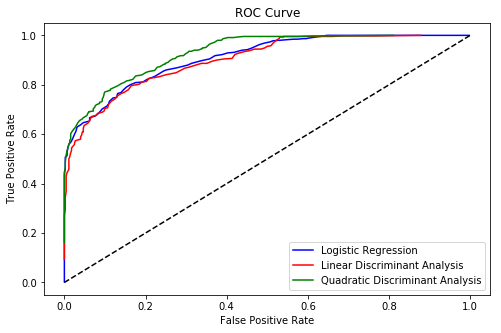

In [185]:
fig2 = plt.figure(figsize=(8,5))
ax1=plt.subplot()
ax1 = ROC_data_lr.plot(x='FP_rate', y='TP_rate', color='blue', ax=ax1, title='ROC Curve', 
                       label='Logistic Regression')
ROC_data_lda.plot(x='FP_rate', y='TP_rate', color='red', ax=ax1, label='Linear Discriminant Analysis')
ROC_data_qda.plot(x='FP_rate', y='TP_rate', color='green', ax=ax1, label='Quadratic Discriminant Analysis')
no_info = np.linspace(0,1,100) # Plot dashed y=x line
plt.plot(no_info, no_info, color='black', linestyle='dashed', label='No Info')
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
plt.show()

# Step 10

#### Area under curve computation

In [186]:
"""
    This function takes in the y vector and computes the high value Riemann sum area
    underneath the curve described by the function y(x) where x is the vector of
    function inputs and y is the function output vector
"""
def area_under_roc_curve(y_vec):
    n = len(y_vec)
    h = 1/n
    total_area = 0.
    y_vec = np.sort(y_vec)
    for y in y_vec:
        area = y*h
        total_area += area
    # End for
    return total_area



In [187]:
log_reg_area = area_under_roc_curve(ROC_data_lr['TP_rate'])
print('Approximate area under Logistic Regression ROC Curve: %.5f' %log_reg_area)
lda_area = area_under_roc_curve(ROC_data_lda['TP_rate'])
print('Approximate area under Linear Discriminant Analysis ROC Curve: %.5f' %lda_area)
qda_area = area_under_roc_curve(ROC_data_qda['TP_rate'])
print('Approximate area under Quadratic Discriminant Analysis ROC Curve: %.5f' %qda_area)

Approximate area under Logistic Regression ROC Curve: 0.72033
Approximate area under Linear Discriminant Analysis ROC Curve: 0.74400
Approximate area under Quadratic Discriminant Analysis ROC Curve: 0.79076


# Step 11

#### Calculating maximum values for accuracy, precision, recall, and F-measure

In [188]:
# Logistic Regression Max values
display(md("#### Logistic Regression"))
ROC_data_lr_acc = ROC_data_lr.sort_values(by='accuracy', ascending=False)
display(ROC_data_lr_acc.head(1))
ROC_data_lr_prec = ROC_data_lr.sort_values(by='precision', ascending=False)
display(ROC_data_lr_prec.head(1))
ROC_data_lr_recall = ROC_data_lr.sort_values(by='TP_rate', ascending=False)
display(ROC_data_lr_recall.head(1))
ROC_data_lr_f_measure = ROC_data_lr.sort_values(by='F-measure', ascending=False)
display(ROC_data_lr_f_measure.head(1))
print('\n')

# Linear Discriminant Analysis Max values
display(md("#### Linear Discriminant Analysis"))
ROC_data_lda_acc = ROC_data_lda.sort_values(by='accuracy', ascending=False)
display(ROC_data_lda_acc.head(1))
ROC_data_lda_prec = ROC_data_lda.sort_values(by='precision', ascending=False)
display(ROC_data_lda_prec.head(1))
ROC_data_lda_recall = ROC_data_lda.sort_values(by='TP_rate', ascending=False)
display(ROC_data_lda_recall.head(1))
ROC_data_lda_f_measure = ROC_data_lda.sort_values(by='F-measure', ascending=False)
display(ROC_data_lda_f_measure.head(1))
print('\n')

# Quadratic Discriminant Analysis Max values
display(md("#### Quadratic Discriminant Analysis"))
ROC_data_qda_acc = ROC_data_qda.sort_values(by='accuracy', ascending=False)
display(ROC_data_qda_acc.head(1))
ROC_data_qda_prec = ROC_data_qda.sort_values(by='precision', ascending=False)
display(ROC_data_qda_prec.head(1))
ROC_data_qda_recall = ROC_data_qda.sort_values(by='TP_rate', ascending=False)
display(ROC_data_qda_recall.head(1))
ROC_data_qda_f_measure = ROC_data_qda.sort_values(by='F-measure', ascending=False)
display(ROC_data_qda_f_measure.head(1))

#### Logistic Regression

,prob_threshold,TP_count,FP_count,TN_count,FN_count,TP_rate,FP_rate,accuracy,precision,F-measure
50,0.504093,360.0,73.0,377.0,90.0,0.8,0.162222,0.818889,0.831409,0.815402


,prob_threshold,TP_count,FP_count,TN_count,FN_count,TP_rate,FP_rate,accuracy,precision,F-measure
99,0.994995,1.0,0.0,450.0,449.0,0.002222,0.0,0.501111,1.0,0.004435


,prob_threshold,TP_count,FP_count,TN_count,FN_count,TP_rate,FP_rate,accuracy,precision,F-measure
0,0.003172,450.0,449.0,1.0,0.0,1.0,0.997778,0.501111,0.500556,0.667161


,prob_threshold,TP_count,FP_count,TN_count,FN_count,TP_rate,FP_rate,accuracy,precision,F-measure
50,0.504093,360.0,73.0,377.0,90.0,0.8,0.162222,0.818889,0.831409,0.815402


#### Linear Discriminant Analysis

,prob_threshold,TP_count,FP_count,TN_count,FN_count,TP_rate,FP_rate,accuracy,precision,F-measure
50,0.505039,358.0,74.0,376.0,92.0,0.795556,0.164444,0.815556,0.828704,0.811791


,prob_threshold,TP_count,FP_count,TN_count,FN_count,TP_rate,FP_rate,accuracy,precision,F-measure
99,0.998998,42.0,0.0,450.0,408.0,0.093333,0.0,0.546667,1.0,0.170732


,prob_threshold,TP_count,FP_count,TN_count,FN_count,TP_rate,FP_rate,accuracy,precision,F-measure
0,0.001,450.0,395.0,55.0,0.0,1.0,0.877778,0.561111,0.532544,0.694981


,prob_threshold,TP_count,FP_count,TN_count,FN_count,TP_rate,FP_rate,accuracy,precision,F-measure
45,0.454635,372.0,94.0,356.0,78.0,0.826667,0.208889,0.808889,0.798283,0.812227


#### Quadratic Discriminant Analysis

,prob_threshold,TP_count,FP_count,TN_count,FN_count,TP_rate,FP_rate,accuracy,precision,F-measure
56,0.565525,347.0,45.0,405.0,103.0,0.771111,0.1,0.835556,0.885204,0.824228


,prob_threshold,TP_count,FP_count,TN_count,FN_count,TP_rate,FP_rate,accuracy,precision,F-measure
99,0.999,73.0,0.0,450.0,377.0,0.162222,0.0,0.581111,1.0,0.279159


,prob_threshold,TP_count,FP_count,TN_count,FN_count,TP_rate,FP_rate,accuracy,precision,F-measure
0,0.001,450.0,365.0,85.0,0.0,1.0,0.811111,0.594444,0.552147,0.711462


,prob_threshold,TP_count,FP_count,TN_count,FN_count,TP_rate,FP_rate,accuracy,precision,F-measure
28,0.283263,421.0,138.0,312.0,29.0,0.935556,0.306667,0.814444,0.753131,0.83449


#### Selecting the best values
Based on the sorting, we select the first row from each of the displayed dataframes above. Note that index values shown are the original dataframe index values and these carry through to the newly created dataframes. 

In [189]:
# Select Max values for Logistic Regression
max_accuracy_lr = ROC_data_lr_acc.loc[50].at['prob_threshold']
max_precision_lr = ROC_data_lr_prec.loc[99].at['prob_threshold']
max_recall_lr = ROC_data_lr_recall.loc[0].at['prob_threshold']
max_f_measure_lr = ROC_data_lr_f_measure.loc[50].at['prob_threshold']
display(md("Logistic Regression"))
print("Probability Threshold for Maximum Accuracy: %.5f" %max_accuracy_lr)
print("Probability Threshold for Maximum Precision: %.5f" %max_precision_lr)
print("Probability Threshold for Maximum Recall: %.5f" %max_recall_lr)
print("Probability Threshold for Maximum F-Measure: %.5f" %max_f_measure_lr)

# Select Max values for LDA
max_accuracy_lda = ROC_data_lda_acc.loc[50].at['prob_threshold']
max_precision_lda = ROC_data_lda_prec.loc[99].at['prob_threshold']
max_recall_lda = ROC_data_lda_recall.loc[0].at['prob_threshold']
max_f_measure_lda = ROC_data_lda_f_measure.loc[45].at['prob_threshold']
display(md("Linear Discriminant Analysis"))
print("Probability Threshold for Maximum Accuracy: %.5f" %max_accuracy_lda)
print("Probability Threshold for Maximum Precision: %.5f" %max_precision_lda)
print("Probability Threshold for Maximum Recall: %.5f" %max_recall_lda)
print("Probability Threshold for Maximum F-Measure: %.5f" %max_f_measure_lda)

# Select Max values for QDA
max_accuracy_qda = ROC_data_qda_acc.loc[56].at['prob_threshold']
max_precision_qda = ROC_data_qda_prec.loc[99].at['prob_threshold']
max_recall_qda = ROC_data_qda_recall.loc[0].at['prob_threshold']
max_f_measure_qda = ROC_data_qda_f_measure.loc[28].at['prob_threshold']
display(md("Quadratic Discriminant Analysis"))
print("Probability Threshold for Maximum Accuracy: %.5f" %max_accuracy_qda)
print("Probability Threshold for Maximum Precision: %.5f" %max_precision_qda)
print("Probability Threshold for Maximum Recall: %.5f" %max_recall_qda)
print("Probability Threshold for Maximum F-Measure: %.5f" %max_f_measure_qda)


Logistic Regression

Probability Threshold for Maximum Accuracy: 0.50409
Probability Threshold for Maximum Precision: 0.99499
Probability Threshold for Maximum Recall: 0.00317
Probability Threshold for Maximum F-Measure: 0.50409


Linear Discriminant Analysis

Probability Threshold for Maximum Accuracy: 0.50504
Probability Threshold for Maximum Precision: 0.99900
Probability Threshold for Maximum Recall: 0.00100
Probability Threshold for Maximum F-Measure: 0.45464


Quadratic Discriminant Analysis

Probability Threshold for Maximum Accuracy: 0.56553
Probability Threshold for Maximum Precision: 0.99900
Probability Threshold for Maximum Recall: 0.00100
Probability Threshold for Maximum F-Measure: 0.28326


In [190]:
"""
    This function creates a pandas dataframe that replicates the confusion matrix for a given set of 
    dataset classification counts. 
    Parameters: true_pos: The true positive count
                true_neg: The true negative count
                false_pos: The false positive count
                false_neg: The false negative count
    Returns: A dataframe containing these values and their respective column totals.
    Purpose: Replicate table 4.5 from ISLR text
"""
def create_confusion_matrix(true_pos, true_neg, false_pos, false_neg):
    confusion_mat = np.array([[true_pos, false_pos, (true_pos + false_pos)], 
                             [false_neg, true_neg, (false_neg + true_neg)], 
                            [(true_pos + false_neg), (false_pos + true_neg), 
                            ((true_pos + false_pos) + (false_neg + true_neg))]], dtype=int)
    confusion_df = pd.DataFrame(confusion_mat, columns=['Actual Positive', 'Actual Negative', 'Total'], 
                                index=['Predicted Positive', 'Predicted Negative', 'Total'])
    return confusion_df

#### Logistic Regression

Create confusion matrices for each of the probability thresholds

In [191]:
# Create confusion matrix for max accuracy threshold
acc_index = 50
true_pos_lr = ROC_data_lr.loc[acc_index].at['TP_count']
false_pos_lr = ROC_data_lr.loc[acc_index].at['FP_count']
true_neg_lr = ROC_data_lr.loc[acc_index].at['TN_count']
false_neg_lr = ROC_data_lr.loc[acc_index].at['FN_count']

display(md("### Confusion Matrices for Logistic Regression"))

confusion_lr_acc = create_confusion_matrix(true_pos_lr, true_neg_lr, false_pos_lr, false_neg_lr)

display(md(r"#### Confusion Matrix for the Probability Threshold for Max Accuracy: $p = %f$" %max_accuracy_lr))
display(confusion_lr_acc)

print()
# Create confusion matrix for max precision threshold
prec_index = 99
true_pos_lr = ROC_data_lr.loc[prec_index].at['TP_count']
false_pos_lr = ROC_data_lr.loc[prec_index].at['FP_count']
true_neg_lr = ROC_data_lr.loc[prec_index].at['TN_count']
false_neg_lr = ROC_data_lr.loc[prec_index].at['FN_count']

confusion_lr_prec = create_confusion_matrix(true_pos_lr, true_neg_lr, false_pos_lr, false_neg_lr)

display(md(r"#### Confusion Matrix for the Probability Threshold for Max Precision: $p = %f$" %max_precision_lr))
display(confusion_lr_prec)
print()
# Create confusion matrix for max Recall threshold
recall_index = 0
true_pos_lr = ROC_data_lr.loc[recall_index].at['TP_count']
false_pos_lr = ROC_data_lr.loc[recall_index].at['FP_count']
true_neg_lr = ROC_data_lr.loc[recall_index].at['TN_count']
false_neg_lr = ROC_data_lr.loc[recall_index].at['FN_count']

confusion_lr_recall = create_confusion_matrix(true_pos_lr, true_neg_lr, false_pos_lr, false_neg_lr)

display(md(r"#### Confusion Matrix for the Probability Threshold for Max Recall: $p = %f$" %max_recall_lr))
display(confusion_lr_recall)

# Create confusion matrix for max F-Measure threshold
f_measure_index = 50
true_pos_lr = ROC_data_lr.loc[f_measure_index].at['TP_count']
false_pos_lr = ROC_data_lr.loc[f_measure_index].at['FP_count']
true_neg_lr = ROC_data_lr.loc[f_measure_index].at['TN_count']
false_neg_lr = ROC_data_lr.loc[f_measure_index].at['FN_count']


confusion_lr_f_measure = create_confusion_matrix(true_pos_lr, true_neg_lr, false_pos_lr, false_neg_lr)

display(md(r"#### Confusion Matrix for the Probability Threshold for Max F-Measure: $p = %f$" %max_f_measure_lr))
display(confusion_lr_f_measure)


### Confusion Matrices for Logistic Regression

#### Confusion Matrix for the Probability Threshold for Max Accuracy: $p = 0.504093$

,Actual Positive,Actual Negative,Total
Predicted Positive,360,73,433
Predicted Negative,90,377,467
Total,450,450,900


#### Confusion Matrix for the Probability Threshold for Max Precision: $p = 0.994995$

,Actual Positive,Actual Negative,Total
Predicted Positive,1,0,1
Predicted Negative,449,450,899
Total,450,450,900


#### Confusion Matrix for the Probability Threshold for Max Recall: $p = 0.003172$

,Actual Positive,Actual Negative,Total
Predicted Positive,450,449,899
Predicted Negative,0,1,1
Total,450,450,900


#### Confusion Matrix for the Probability Threshold for Max F-Measure: $p = 0.504093$

,Actual Positive,Actual Negative,Total
Predicted Positive,360,73,433
Predicted Negative,90,377,467
Total,450,450,900


#### Linear Discriminant Analysis

In [192]:
acc_index = 50
prec_index = 99
recall_index = 0
f_measure_index = 45

display(md("### Confusion Matrices for Linear Discriminant Analysis"))

# Create confusion matrix for max accuracy threshold
true_pos_lda = ROC_data_lda.loc[acc_index].at['TP_count']
false_pos_lda = ROC_data_lda.loc[acc_index].at['FP_count']
true_neg_lda = ROC_data_lda.loc[acc_index].at['TN_count']
false_neg_lda = ROC_data_lda.loc[acc_index].at['FN_count']

confusion_lda_acc = create_confusion_matrix(true_pos_lda, true_neg_lda, false_pos_lda, false_neg_lda)

display(md(r"#### Confusion Matrix for the Probability Threshold for Max Accuracy: $p = %f$" %max_accuracy_lda))
display(confusion_lda_acc)

# Create confusion matrix for max precision threshold
true_pos_lda = ROC_data_lda.loc[prec_index].at['TP_count']
false_pos_lda = ROC_data_lda.loc[prec_index].at['FP_count']
true_neg_lda = ROC_data_lda.loc[prec_index].at['TN_count']
false_neg_lda = ROC_data_lda.loc[prec_index].at['FN_count']

confusion_lda_prec = create_confusion_matrix(true_pos_lda, true_neg_lda, false_pos_lda, false_neg_lda)

display(md(r"#### Confusion Matrix for the Probability Threshold for Max Precision: $p = %f$" %max_precision_lda))
display(confusion_lda_prec)

# Create confusion matrix for max Recall threshold
true_pos_lda = ROC_data_lda.loc[recall_index].at['TP_count']
false_pos_lda = ROC_data_lda.loc[recall_index].at['FP_count']
true_neg_lda = ROC_data_lda.loc[recall_index].at['TN_count']
false_neg_lda = ROC_data_lda.loc[recall_index].at['FN_count']

confusion_lda_recall = create_confusion_matrix(true_pos_lda, true_neg_lda, false_pos_lda, false_neg_lda)

display(md(r"#### Confusion Matrix for the Probability Threshold for Max Recall: $p = %f$" %max_recall_lda))
display(confusion_lda_recall)

# Create confusion matrix for max Recall threshold
true_pos_lda = ROC_data_lda.loc[f_measure_index].at['TP_count']
false_pos_lda = ROC_data_lda.loc[f_measure_index].at['FP_count']
true_neg_lda = ROC_data_lda.loc[f_measure_index].at['TN_count']
false_neg_lda = ROC_data_lda.loc[f_measure_index].at['FN_count']

confusion_lda_f_measure = create_confusion_matrix(true_pos_lda, true_neg_lda, false_pos_lda, false_neg_lda)

display(md(r"#### Confusion Matrix for the Probability Threshold for Max F-Measure: $p = %f$" %max_f_measure_lda))
display(confusion_lda_f_measure)

### Confusion Matrices for Linear Discriminant Analysis

#### Confusion Matrix for the Probability Threshold for Max Accuracy: $p = 0.505039$

,Actual Positive,Actual Negative,Total
Predicted Positive,358,74,432
Predicted Negative,92,376,468
Total,450,450,900


#### Confusion Matrix for the Probability Threshold for Max Precision: $p = 0.998998$

,Actual Positive,Actual Negative,Total
Predicted Positive,42,0,42
Predicted Negative,408,450,858
Total,450,450,900


#### Confusion Matrix for the Probability Threshold for Max Recall: $p = 0.001000$

,Actual Positive,Actual Negative,Total
Predicted Positive,450,395,845
Predicted Negative,0,55,55
Total,450,450,900


#### Confusion Matrix for the Probability Threshold for Max F-Measure: $p = 0.454635$

,Actual Positive,Actual Negative,Total
Predicted Positive,372,94,466
Predicted Negative,78,356,434
Total,450,450,900


#### Quadratic Discriminant Analysis

In [193]:
acc_index = 56
prec_index = 99
recall_index = 0
f_measure_index = 28

display(md("### Confusion Matrices for Quadratic Discriminant Analysis"))

# Create confusion matrix for max accuracy threshold
true_pos_qda = ROC_data_qda.loc[acc_index].at['TP_count']
false_pos_qda = ROC_data_qda.loc[acc_index].at['FP_count']
true_neg_qda = ROC_data_qda.loc[acc_index].at['TN_count']
false_neg_qda = ROC_data_qda.loc[acc_index].at['FN_count']

confusion_qda_acc = create_confusion_matrix(true_pos_qda, true_neg_qda, false_pos_qda, false_neg_qda)

display(md(r"#### Confusion Matrix for the Probability Threshold for Max Accuracy: $p = %f$" %max_accuracy_qda))
display(confusion_qda_acc)

# Create confusion matrix for max precision threshold
true_pos_qda = ROC_data_qda.loc[prec_index].at['TP_count']
false_pos_qda = ROC_data_qda.loc[prec_index].at['FP_count']
true_neg_qda = ROC_data_qda.loc[prec_index].at['TN_count']
false_neg_qda = ROC_data_qda.loc[prec_index].at['FN_count']

confusion_qda_prec = create_confusion_matrix(true_pos_qda, true_neg_qda, false_pos_qda, false_neg_qda)

display(md(r"#### Confusion Matrix for the Probability Threshold for Max Precision: $p = %f$" %max_precision_qda))
display(confusion_qda_prec)

# Create confusion matrix for max Recall threshold
true_pos_qda = ROC_data_qda.loc[recall_index].at['TP_count']
false_pos_qda = ROC_data_qda.loc[recall_index].at['FP_count']
true_neg_qda = ROC_data_qda.loc[recall_index].at['TN_count']
false_neg_qda = ROC_data_qda.loc[recall_index].at['FN_count']

confusion_qda_recall = create_confusion_matrix(true_pos_qda, true_neg_qda, false_pos_qda, false_neg_qda)

display(md(r"#### Confusion Matrix for the Probability Threshold for Max Recall: $p = %f$" %max_recall_qda))
display(confusion_qda_recall)

# Create confusion matrix for max F-measure threshold
true_pos_qda = ROC_data_qda.loc[f_measure_index].at['TP_count']
false_pos_qda = ROC_data_qda.loc[f_measure_index].at['FP_count']
true_neg_qda = ROC_data_qda.loc[f_measure_index].at['TN_count']
false_neg_qda = ROC_data_qda.loc[f_measure_index].at['FN_count']

confusion_qda_f_measure = create_confusion_matrix(true_pos_qda, true_neg_qda, false_pos_qda, false_neg_qda)

display(md(r"#### Confusion Matrix for the Probability Threshold for Max F-Measure: $p = %f$" %max_f_measure_qda))
display(confusion_qda_f_measure)


### Confusion Matrices for Quadratic Discriminant Analysis

#### Confusion Matrix for the Probability Threshold for Max Accuracy: $p = 0.565525$

,Actual Positive,Actual Negative,Total
Predicted Positive,347,45,392
Predicted Negative,103,405,508
Total,450,450,900


#### Confusion Matrix for the Probability Threshold for Max Precision: $p = 0.999000$

,Actual Positive,Actual Negative,Total
Predicted Positive,73,0,73
Predicted Negative,377,450,827
Total,450,450,900


#### Confusion Matrix for the Probability Threshold for Max Recall: $p = 0.001000$

,Actual Positive,Actual Negative,Total
Predicted Positive,450,365,815
Predicted Negative,0,85,85
Total,450,450,900


#### Confusion Matrix for the Probability Threshold for Max F-Measure: $p = 0.283263$

,Actual Positive,Actual Negative,Total
Predicted Positive,421,138,559
Predicted Negative,29,312,341
Total,450,450,900


# Step 12

#### Create annotation points
Note: Indices used for annotation points are the ones determined in step 11.

In [194]:
# Create annotation points for each curve

#Annotation points for LR
acc_index_lr = 50
prec_index_lr = 99
recall_index_lr = 0
f_measure_index_lr = 50
acc_x_lr = ROC_data_lr.loc[acc_index_lr].at['FP_rate']
acc_y_lr = ROC_data_lr.loc[acc_index_lr].at['TP_rate']
prec_x_lr = ROC_data_lr.loc[prec_index_lr].at['FP_rate']
prec_y_lr = ROC_data_lr.loc[prec_index_lr].at['TP_rate']
rec_x_lr = ROC_data_lr.loc[recall_index_lr].at['FP_rate']
rec_y_lr = ROC_data_lr.loc[recall_index_lr].at['TP_rate']
fm_x_lr = ROC_data_lr.loc[f_measure_index_lr].at['FP_rate']
fm_y_lr = ROC_data_lr.loc[f_measure_index_lr].at['TP_rate']

#Annotation points for LDA
acc_index_lda = 50
prec_index_lda = 99
recall_index_lda = 0
f_measure_index_lda = 45
acc_x_lda = ROC_data_lda.loc[acc_index_lda].at['FP_rate']
acc_y_lda = ROC_data_lda.loc[acc_index_lda].at['TP_rate']
prec_x_lda = ROC_data_lda.loc[prec_index_lda].at['FP_rate']
prec_y_lda = ROC_data_lda.loc[prec_index_lda].at['TP_rate']
rec_x_lda = ROC_data_lda.loc[recall_index_lda].at['FP_rate']
rec_y_lda = ROC_data_lda.loc[recall_index_lda].at['TP_rate']
fm_x_lda = ROC_data_lda.loc[f_measure_index_lda].at['FP_rate']
fm_y_lda = ROC_data_lda.loc[f_measure_index_lda].at['TP_rate']

#Annotation points for QDA
acc_index_qda = 56
prec_index_qda = 99
recall_index_qda = 0
f_measure_index_qda = 28
acc_x_qda = ROC_data_qda.loc[acc_index_qda].at['FP_rate']
acc_y_qda = ROC_data_qda.loc[acc_index_qda].at['TP_rate']
prec_x_qda = ROC_data_qda.loc[prec_index_qda].at['FP_rate']
prec_y_qda = ROC_data_qda.loc[prec_index_qda].at['TP_rate']
rec_x_qda = ROC_data_qda.loc[recall_index_qda].at['FP_rate']
rec_y_qda = ROC_data_qda.loc[recall_index_qda].at['TP_rate']
fm_x_qda = ROC_data_qda.loc[f_measure_index_qda].at['FP_rate']
fm_y_qda = ROC_data_qda.loc[f_measure_index_qda].at['TP_rate']

#### Annotate graph of ROC curves

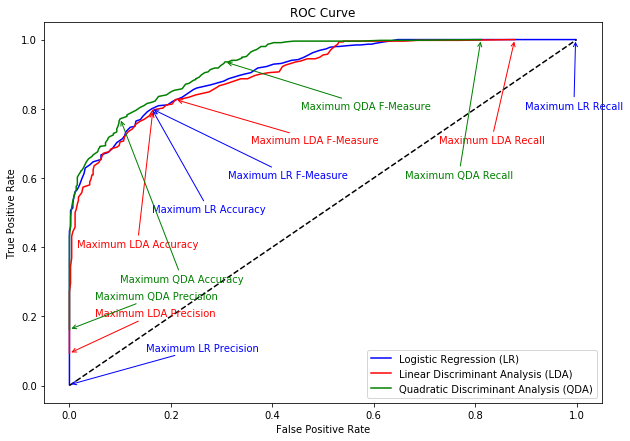

In [195]:
fig3 = plt.figure(figsize=(10,7))
ax2=plt.subplot()
ax_lr = ROC_data_lr.plot(x='FP_rate', y='TP_rate', color='blue', ax=ax2, title='ROC Curve', 
                       label='Logistic Regression (LR)')
# Plot and annotate LR Curve
ax_lr.annotate('Maximum LR Accuracy', xy=(acc_x_lr, acc_y_lr), xytext=(acc_x_lr, 0.5), arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3", ec="blue"), color='b')
ax_lr.annotate('Maximum LR Precision', xy=(prec_x_lr, prec_y_lr), xytext=(prec_x_lr+0.15, 0.1), arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3", ec="blue"), color='b')
ax_lr.annotate('Maximum LR Recall', xy=(rec_x_lr, rec_y_lr), xytext=(rec_x_lr-0.1, 0.8), arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3", ec="blue"), color='b')
ax_lr.annotate('Maximum LR F-Measure', xy=(fm_x_lr, fm_y_lr), xytext=(fm_x_lr+0.15, 0.6), arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3", ec="blue"), color='b')
# Plot and annotate LDA curve
ax_lda = ROC_data_lda.plot(x='FP_rate', y='TP_rate', color='red', ax=ax2, 
                           label='Linear Discriminant Analysis (LDA)')
ax_lda.annotate('Maximum LDA Accuracy', xy=(acc_x_lda, acc_y_lda), xytext=(acc_x_lda-0.15, 0.4), arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3", ec="red"), color='r')
ax_lda.annotate('Maximum LDA Precision', xy=(prec_x_lda, prec_y_lda), xytext=(prec_x_lda+.05, 0.2), arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3", ec="red"), color='r')
ax_lda.annotate('Maximum LDA Recall', xy=(rec_x_lda, rec_y_lda), xytext=(rec_x_lda-0.15, 0.7), arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3", ec="red"), color='r')
ax_lda.annotate('Maximum LDA F-Measure', xy=(fm_x_lda, fm_y_lda), xytext=(fm_x_lda+0.15, 0.7), arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3", ec="red"), color='r')

# Plot and annotate QDA curve
ax_qda = ROC_data_qda.plot(x='FP_rate', y='TP_rate', color='green', ax=ax2, 
                           label='Quadratic Discriminant Analysis (QDA)')
ax_qda.annotate('Maximum QDA Accuracy', xy=(acc_x_qda, acc_y_qda), xytext=(acc_x_qda, 0.3), arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3", ec="green"), color='g')
ax_qda.annotate('Maximum QDA Precision', xy=(prec_x_qda, prec_y_qda), xytext=(prec_x_qda+.05, 0.25), arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3", ec="green"), color='g')
ax_qda.annotate('Maximum QDA Recall', xy=(rec_x_qda, rec_y_qda), xytext=(rec_x_qda-0.15, 0.6), arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3", ec="green"), color='g')
ax_qda.annotate('Maximum QDA F-Measure', xy=(fm_x_qda, fm_y_qda), xytext=(fm_x_qda+0.15, 0.8), arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3", ec="green"), color='g')

# Add random chance ROC "curve"
no_info = np.linspace(0,1,100) # Plot dashed y=x line
ax_rand = plt.plot(no_info, no_info, color='black', linestyle='dashed', label='No Info')
#Set labels and show
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
plt.show()


### Annotation point comments

#### Accuracy
In general, we see the accuracy points located in the upper left portion of the ROC curve. This is the point in the curve where we see more of a minimized false positive rate and a relatively high true positive rate. 


#### Precision
The points for precision are all located in the bottom left of the curve where the false positive rate is basically 0. This is due to the metric for precision minimizing the false positive rate, and naturally, it is minimized at 0. 


#### Recall (True Positive Rate)
Conversely to precision, we see that the points for recall are all located in the upper right portion of the curve, where the true positive rate is 1. This is because the metric for recall is to maximize the value of recall which occurs at 1. 

#### F-Measure
Similar to accuracy, we see that the points for F-measure are all located in the upper left corner of the ROC curve. However, they tend to have a higher false positive rate but also have a higher true positive rate. This happens because F-measure attempts to maximize true positive while simultaneously minimizing false positive rate. This essentially balances the precision and recall metrics into a happy medium.

#### Dotted line 
The dotted line represents the no information classifier. This is the ROC curve that we would expect if neither of the features impacted the classification.

# Step 13: Recommendations

## A: Recommended Models for Each Dataset

To determine what model is best for each dataset, We run the specified test dataset through the model that was trained on the training half of the specified dataset. For example, we run test dataset 1 through the models trained with training dataset 1.

The metric chosen for determination is the percentage of correctly classified points based on the results of the score function on the specified test dataset. The model that has the highest percentage of correctly classified points will be the recommended model. This metric is chosen since the goal is to correctly classify future datapoints into the provided classes. Thus, the highest percentage of correct classifications on unseen data makes sense as the scoring metric.

### Dataset 1


In [196]:
# Score each model on dataset 1
lr1_score = log_reg1.score(X1_test, y1_test)
lda1_score = lda1.score(X1_test, y1_test)
qda1_score = qda1.score(X1_test, y1_test)

display(md("Percentage of correctly classified points from Logistic Regression model: %.2f" %(lr1_score*100)))
display(md("Percentage of correctly classified points from Linear Discriminant Analysis model: %.2f" %(lda1_score*100)))
display(md("Percentage of correctly classified points from Quadratic Discriminant Analysis model: %.2f" %(qda1_score*100)))


Percentage of correctly classified points from Logistic Regression model: 75.67

Percentage of correctly classified points from Linear Discriminant Analysis model: 75.00

Percentage of correctly classified points from Quadratic Discriminant Analysis model: 75.00

#### Recommendation for Dataset 1
I would recommend the Logistic Regression model for dataset 1. It has the highest percentage of correct classifications on the test dataset. 

### Dataset 2

In [197]:
lr2_score = log_reg2.score(X2_test, y2_test)
lda2_score = lda1.score(X2_test, y2_test)
qda2_score = qda1.score(X2_test, y2_test)

display(md("Percentage of correctly classified points from Logistic Regression model: %.2f" %(lr2_score*100)))
display(md("Percentage of correctly classified points from Linear Discriminant Analysis model: %.2f" %(lda2_score*100)))
display(md("Percentage of correctly classified points from Quadratic Discriminant Analysis model: %.2f" %(qda2_score*100)))


Percentage of correctly classified points from Logistic Regression model: 93.00

Percentage of correctly classified points from Linear Discriminant Analysis model: 75.33

Percentage of correctly classified points from Quadratic Discriminant Analysis model: 75.00

#### Recommendation for Dataset 2
I would highly recommend the Logistic Regression model for dataset 2. It scored way above the other 2 models with 93% correct classification.

### Dataset 3

In [198]:
lr3_score = log_reg3.score(X3_test, y3_test)
lda3_score = lda3.score(X3_test, y3_test)
qda3_score = qda3.score(X3_test, y3_test)

display(md("Percentage of correctly classified points from Logistic Regression model: %.2f" %(lr3_score*100)))
display(md("Percentage of correctly classified points from Linear Discriminant Analysis model: %.2f" %(lda3_score*100)))
display(md("Percentage of correctly classified points from Quadratic Discriminant Analysis model: %.2f" %(qda3_score*100)))


Percentage of correctly classified points from Logistic Regression model: 76.00

Percentage of correctly classified points from Linear Discriminant Analysis model: 77.33

Percentage of correctly classified points from Quadratic Discriminant Analysis model: 81.33

#### Recommendation for Dataset 3
I would recommend the Quadratic Discriminant Analysis model for dataset 3. It had a higher correct classification percentage than the other 2 models at 81.33%.

## B: Recommended Probability Threshold

Since the goal of the customer is to balance the risk of false positives and false negatives, we have to look for the probability threshold that contains the smallest difference between the false positive count and the false negative count.

The function described below locates the probability threshold for which the difference between false positive count and false negative count is minized in the provided dataframe.

In [199]:
def balanced_df(ROC_data):
    min_diff = 450
    min_thresh = []
    min_index = 100
    num_rows = ROC_data.shape[0]
    for x in range(0,num_rows-1):
        diff = np.abs(ROC_data.loc[x].at['FP_count'] - ROC_data.loc[x].at['FN_count'])
        if diff < min_diff:
            min_diff = diff
            min_thresh = ROC_data.loc[x]
            
     # End For
    return min_thresh

In [200]:
balanced_fp_fn_lr = balanced_df(ROC_data_lr)
display(md("#### Probability threshold for balanced risk of false positives and false negatives"))
print("Logistic Regression: %.5f" %balanced_fp_fn_lr[0])

balanced_fp_fn_lda = balanced_df(ROC_data_lda)
print("Linear Discrminant Analysis: %.5f" %balanced_fp_fn_lda[0])

balanced_fp_fn_qda = balanced_df(ROC_data_qda)
print("Quadratic Discrminant Analysis: %.5f" %balanced_fp_fn_qda[0])

# Display accuracy rates at the given thresholds
display(md("#### Accuracy for each model at the given thresholds"))
print("LR - Threshold: %.5f, Accuracy: %.5f" %(balanced_fp_fn_lr[0], balanced_fp_fn_lr[7]))
print("LDA - Threshold: %.5f, Accuracy: %.5f" %(balanced_fp_fn_lda[0], balanced_fp_fn_lda[7]))
print("QDA - Threshold: %.5f, Accuracy: %.5f" %(balanced_fp_fn_qda[0], balanced_fp_fn_qda[7]))


#### Probability threshold for balanced risk of false positives and false negatives

Logistic Regression: 0.48406
Linear Discrminant Analysis: 0.47480
Quadratic Discrminant Analysis: 0.48488


#### Accuracy for each model at the given thresholds

LR - Threshold: 0.48406, Accuracy: 0.80889
LDA - Threshold: 0.47480, Accuracy: 0.81000
QDA - Threshold: 0.48488, Accuracy: 0.82667


### Probability Threshold Recommendation

Based on the above information, to balance the risk of false positives and false negatives. I would use the following probability thresholds: 

 * Logistic Regression - 0.48406
 * Linear Discrminant Analysis - 0.47480
 * Quadratic Discrminant Analysis - 0.48488